![title](./images/vader_1.jpg)

# En este ejercicio, enseñaremos sentimientos al ordenador
<br>

 <div class="alert alert-block alert-info">
El <strong>sentiment analysis</strong> se usa sobre todo en el ámbito de las redes sociales, y el marketing digital.
</div>

<br>

## Contenidos ##
- ### Librería vader de analisis de sentimientos.
- ### Ejemplo de frases positivas, negativas y neutras.
- ### Ejemplo de traducción a otros idiomas
- ### Analisis del hashtag de twitter
- ### Resultado y conclusión

Vamos a medir la intensidad del sentimiento usando la librería vader. https://github.com/cjhutto/vaderSentiment

Nos va a devolver un diccionario con la polarización de sentimientos (el polarity score).
 - neg: Negative
 - neu: Neutral
 - pos: Positive
 - compound: Compound (i.e. aggregated score)

In [327]:
# Definimos una gráfica
import matplotlib.pyplot as plt

def mostrar_grafica(puntuacion):
    plt.bar(range(len(puntuacion)), list(puntuacion.values()), align='center')
    plt.xticks(range(len(puntuacion)), list(puntuacion.keys()))
    plt.show()


Probamos con una frase neutral

Let's get work. 
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


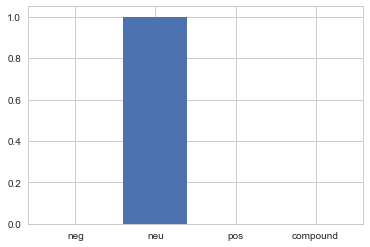

In [329]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
FRASE="Let's get work."

puntuacion = SentimentIntensityAnalyzer().polarity_scores(FRASE)

print( FRASE , "\n",puntuacion)

mostrar_grafica(puntuacion)


Una frase positiva

This tea is excellent 
 {'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719}


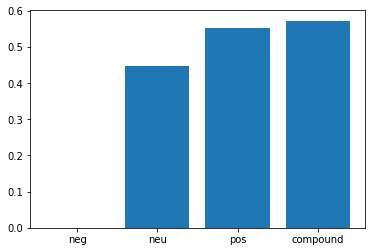

In [3]:

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

FRASE="This tea is excellent"

puntuacion = SentimentIntensityAnalyzer().polarity_scores(FRASE)

print( FRASE , "\n", puntuacion)

mostrar_grafica(puntuacion)



Y una frase negativa

The traffic is a living hell. 
 {'neg': 0.535, 'neu': 0.465, 'pos': 0.0, 'compound': -0.6808}


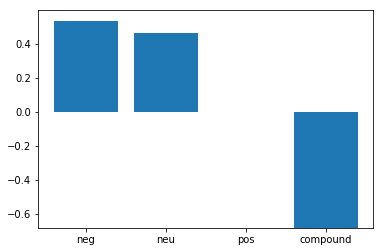

In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

FRASE="The traffic is a living hell."

puntuacion = SentimentIntensityAnalyzer().polarity_scores(FRASE)

print( FRASE , "\n", puntuacion)
mostrar_grafica(puntuacion)


### Ejemplo de traducción a otros idiomas

Hay que traducir la frase, antes de pasársela a vader.

Se ha estropeado la maldita máquina, joder joder joder.  se traduce por :  The damn machine is screwed up, fuck fuck fuck.
The damn machine is screwed up, fuck fuck fuck. {'neg': 0.804, 'neu': 0.196, 'pos': 0.0, 'compound': -0.9468}


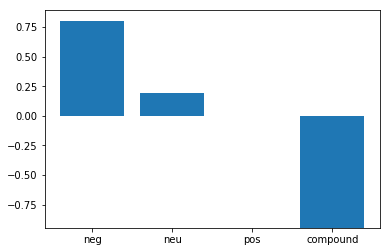

In [5]:
import requests
import json
import string

frase = "Se ha estropeado la maldita máquina, joder joder joder."

from_lang = 'es'
to_lang = 'en'
api_url = "http://mymemory.translated.net/api/get?q={}&langpair={}|{}".format(frase, from_lang, to_lang)

hdrs = { 'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
        'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
        'Accept-Encoding': 'none',
        'Accept-Language': 'en-US,en;q=0.8',
        'Connection': 'keep-alive'}

response = requests.get(api_url, headers=hdrs)
response_json = json.loads(response.text)
translation = response_json["responseData"]["translatedText"]
print(frase, " se traduce por : ",translation)

sentence = translation

analyzer = SentimentIntensityAnalyzer()
puntuacion = analyzer.polarity_scores(sentence)

print(sentence, puntuacion)

mostrar_grafica(puntuacion)



### Sentiment analisys del hashtag de twitter

Vamos a descargarnos los tweeter de un hastag determinado, y le vamos a pasar por vader.


La idea es detectar los tweets negativos sobre algo.


El hashtag es #Telefonica

In [308]:

import tweepy
import csv
import pandas as pd
from datetime import date, timedelta

####
# Quitamos la primera letra de las variables, y ponemos un guión para despistar a los parser
onsumer_key    = 'h_mFJIxaV0HqCuKVZc8iZL65sJ'
onsumer_secret = 'l_eDBguzuUDqd4v2YwKf9cYywWBWEDX4XV341HVdLHC18n1C7kP'
ccess_token    = '7_92058678581026816-ZZk5lNrzMcLJdHRrRLMn6LIksQLDZTi'
ccess_token_secret   = 'z_skKIFghdWezAgpChHLGrVX6OtZPBOmSOvG1tPMtWlK6b'

print(" Nos conectamos a twitter" )


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

hashtag = "#Telefonica"
array = []

# Pedimos datos al api
for tweet in tweepy.Cursor(api.search , count=100,q=hashtag, lang="en", tweet_mode="extended").items() :
    array.append({"hashtag" : hashtag  , "tweet" : tweet.full_text})

# Guardar a disco    
df = pd.DataFrame(array)
df.to_csv('datasets/tweeter.csv',index=False)

print(" Acabamos de descargarnos los tweets" )


 Empezamos 2
 Acabamos de descargarnos los tweets


In [19]:
#########################################
### Cargamos el DataFrame, desde un csv.
#########################################
import pandas as pd
tweets = pd.read_csv('datasets/tweeter-telefonica.csv',encoding = 'utf8')
tweets

,hashtag,tweet
0,#Telefonica,So my second part of my #IBEI #Telefonica fell...
1,#Telefonica,$A1J5RX #Telefonica Deutschland Holdings 1 dir...
2,#Telefonica,Simplified: 3 currencies shape a shoppers chan...
3,#Telefonica,Frost &amp; Sullivan experts disclose operator...
4,#Telefonica,#Telefonica to air new #Vamos sports channel t...
5,#Telefonica,$TEF #TELEFONICA #DANGER TicTac https://t.co/Q...
6,#Telefonica,#Telefónica re-allocated marketing budget from...
7,#Telefonica,RT @yannickramcke: Re-allocation of #marketing...
8,#Telefonica,Re-allocation of #marketing budget: @FCBarcelo...
9,#Telefonica,#Telefonica Chile mitigating Cloud Disruption ...


In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

array_puntuaciones = []
for index, row in tweets.iterrows():
    puntuacion = SentimentIntensityAnalyzer().polarity_scores(row.tweet.replace("#",""))
    array_puntuaciones.append ( puntuacion)


df = pd.DataFrame(array_puntuaciones)
df["hashtag"] = tweets["hashtag"]
df["tweet"]   = tweets["tweet"]

df

,compound,neg,neu,pos,hashtag,tweet
0,0.0000,0.000,1.000,0.000,#Telefonica,So my second part of my #IBEI #Telefonica fell...
1,0.5106,0.000,0.893,0.107,#Telefonica,$A1J5RX #Telefonica Deutschland Holdings 1 dir...
2,0.5994,0.000,0.836,0.164,#Telefonica,Simplified: 3 currencies shape a shoppers chan...
3,0.0000,0.000,1.000,0.000,#Telefonica,Frost &amp; Sullivan experts disclose operator...
4,0.0000,0.000,1.000,0.000,#Telefonica,#Telefonica to air new #Vamos sports channel t...
5,-0.6289,0.508,0.492,0.000,#Telefonica,$TEF #TELEFONICA #DANGER TicTac https://t.co/Q...
6,-0.2057,0.052,0.948,0.000,#Telefonica,#Telefónica re-allocated marketing budget from...
7,0.1779,0.000,0.898,0.102,#Telefonica,RT @yannickramcke: Re-allocation of #marketing...
8,0.2960,0.000,0.906,0.094,#Telefonica,Re-allocation of #marketing budget: @FCBarcelo...
9,-0.5574,0.295,0.705,0.000,#Telefonica,#Telefonica Chile mitigating Cloud Disruption ...


In [321]:
s = f"""<h3>El tweet mas positivo : </h3>"""
display(HTML(s))

df[df['pos'] == df['pos'].max()]


,compound,neg,neu,pos,hashtag,tweet
10,0.34,0.0,0.789,0.211,#Telefonica,Telcos should provide security and not just co...


In [322]:
from IPython.display import Image
from IPython.core.display import HTML 

s = f"""<h3>El tweet mas negativo : </h3>"""


display(HTML(s))

df[df['neg'] == df['neg'].max()]

,compound,neg,neu,pos,hashtag,tweet
5,-0.6289,0.508,0.492,0.0,#Telefonica,$TEF #TELEFONICA #DANGER TicTac https://t.co/Q...


In [244]:
s = f"""<h3>El tweet con mayor puntuacion global es : </h3>"""
display(HTML(s))


df[df['compound'] == df['compound'].max()]

,compound,neg,neu,pos,hashtag,tweet
14,0.6956,0.0,0.872,0.128,#Telefonica,As telco operator #Telefónica strengthened its...


In [335]:
df.describe()

,compound,neg,neu,pos
count,17.000000,17.000000,17.000000,17.000000
mean,0.017094,0.080412,0.869471,0.050118
std,0.413469,0.152033,0.139353,0.069779
min,-0.628900,0.000000,0.492000,0.000000
25%,-0.205700,0.000000,0.789000,0.000000
50%,0.000000,0.000000,0.898000,0.000000
75%,0.296000,0.052000,1.000000,0.102000
max,0.695600,0.508000,1.000000,0.211000


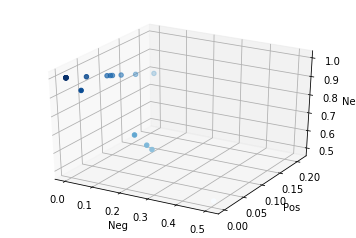

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

ax = plt.axes(projection='3d')


ax.set_xlabel('Neg')
ax.set_ylabel('Pos')
ax.set_zlabel('Neu')
ax.scatter3D(df.neg.values, df.pos.values, df.neu.values, c=df.neu.values, cmap='Blues');

## Resultados

En la representación se ve que hay mas tweets neutros/negativos que positivos. 
Eso es lo esperable, dado que son hashtag corporativos.

## Conclusion

Estudiando y monitorizando el sentiment analisys, podemos entender y mejorar nuestro posicionamiento en las redes sociales.
